W14 - Heart Disease Analysis

1. Data Preparation / Cleaning

In [60]:
import pandas as pd
data = pd.read_csv(r"C:\Users\ACER\Downloads\heart.csv", sep=',')
data.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [61]:
# Drop unnecessary column
list_kolom = ['sex', 'cp', 'exng', 'trtbps','slp', 'caa']
df = data.drop(columns=list_kolom, axis=1)
display(df)

,age,chol,fbs,restecg,thalachh,oldpeak,thall,output
0,63,233,1,0,150,2.3,1,1
1,37,250,0,1,187,3.5,2,1
2,41,204,0,0,172,1.4,2,1
3,56,236,0,1,178,0.8,2,1
4,57,354,0,1,163,0.6,2,1
...,...,...,...,...,...,...,...,...
298,57,241,0,1,123,0.2,3,0
299,45,264,0,1,132,1.2,3,0
300,68,193,1,1,141,3.4,3,0
301,57,131,0,1,115,1.2,3,0


In [62]:
#Missing values
df.isnull().any()

age         False
chol        False
fbs         False
restecg     False
thalachh    False
oldpeak     False
thall       False
output      False
dtype: bool

In [63]:
df.info()
print (df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   chol      303 non-null    int64  
 2   fbs       303 non-null    int64  
 3   restecg   303 non-null    int64  
 4   thalachh  303 non-null    int64  
 5   oldpeak   303 non-null    float64
 6   thall     303 non-null    int64  
 7   output    303 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 19.1 KB
     age  chol  fbs  restecg  thalachh  oldpeak  thall  output
0     63   233    1        0       150      2.3      1       1
1     37   250    0        1       187      3.5      2       1
2     41   204    0        0       172      1.4      2       1
3     56   236    0        1       178      0.8      2       1
4     57   354    0        1       163      0.6      2       1
..   ...   ...  ...      ...       ...      ...    ...     ...
298   57   241

In [64]:
print(df.corr())

               age      chol       fbs   restecg  thalachh   oldpeak  \
age       1.000000  0.213678  0.121308 -0.116211 -0.398522  0.210013   
chol      0.213678  1.000000  0.013294 -0.151040 -0.009940  0.053952   
fbs       0.121308  0.013294  1.000000 -0.084189 -0.008567  0.005747   
restecg  -0.116211 -0.151040 -0.084189  1.000000  0.044123 -0.058770   
thalachh -0.398522 -0.009940 -0.008567  0.044123  1.000000 -0.344187   
oldpeak   0.210013  0.053952  0.005747 -0.058770 -0.344187  1.000000   
thall     0.068001  0.098803 -0.032019 -0.011981 -0.096439  0.210244   
output   -0.225439 -0.085239 -0.028046  0.137230  0.421741 -0.430696   

             thall    output  
age       0.068001 -0.225439  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
oldpeak   0.210244 -0.430696  
thall     1.000000 -0.344029  
output   -0.344029  1.000000  


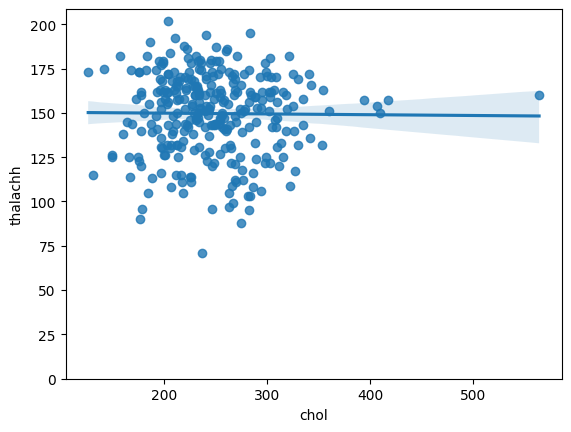

             chol  thalachh
chol      1.00000  -0.00994
thalachh -0.00994   1.00000


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(data)
# Engine-size berpotensi sebagai variabel predictor terhadap price
sns.regplot(x="chol", y="thalachh", data=df)
plt.ylim(0,)
plt.show()
print(data[["chol", "thalachh"]].corr())

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

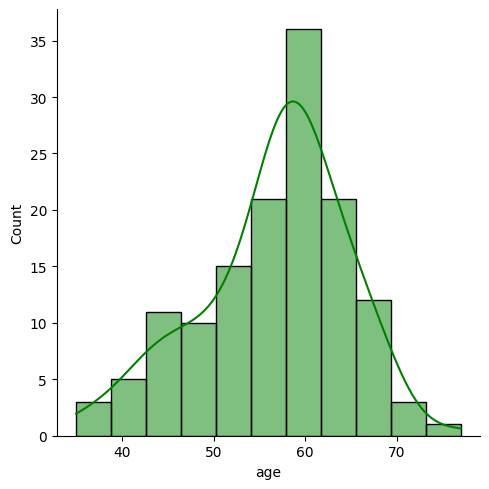

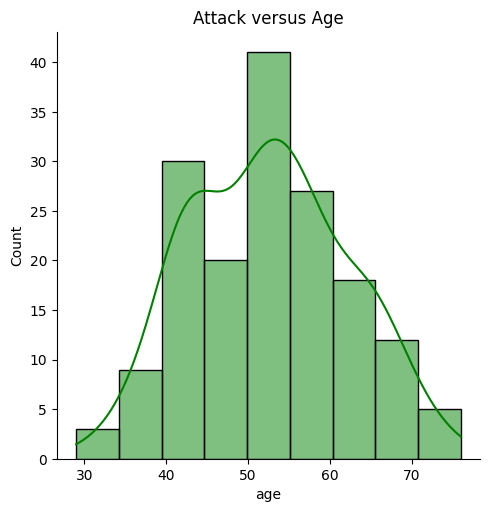

In [66]:
plt.figure(figsize=(10,10))
sns.displot(data[data['output']== 0]['age'], color='green', kde=True)
sns.displot(data[data['output']== 1]['age'], color='green', kde=True)
plt.title('Attack versus Age')
plt.show


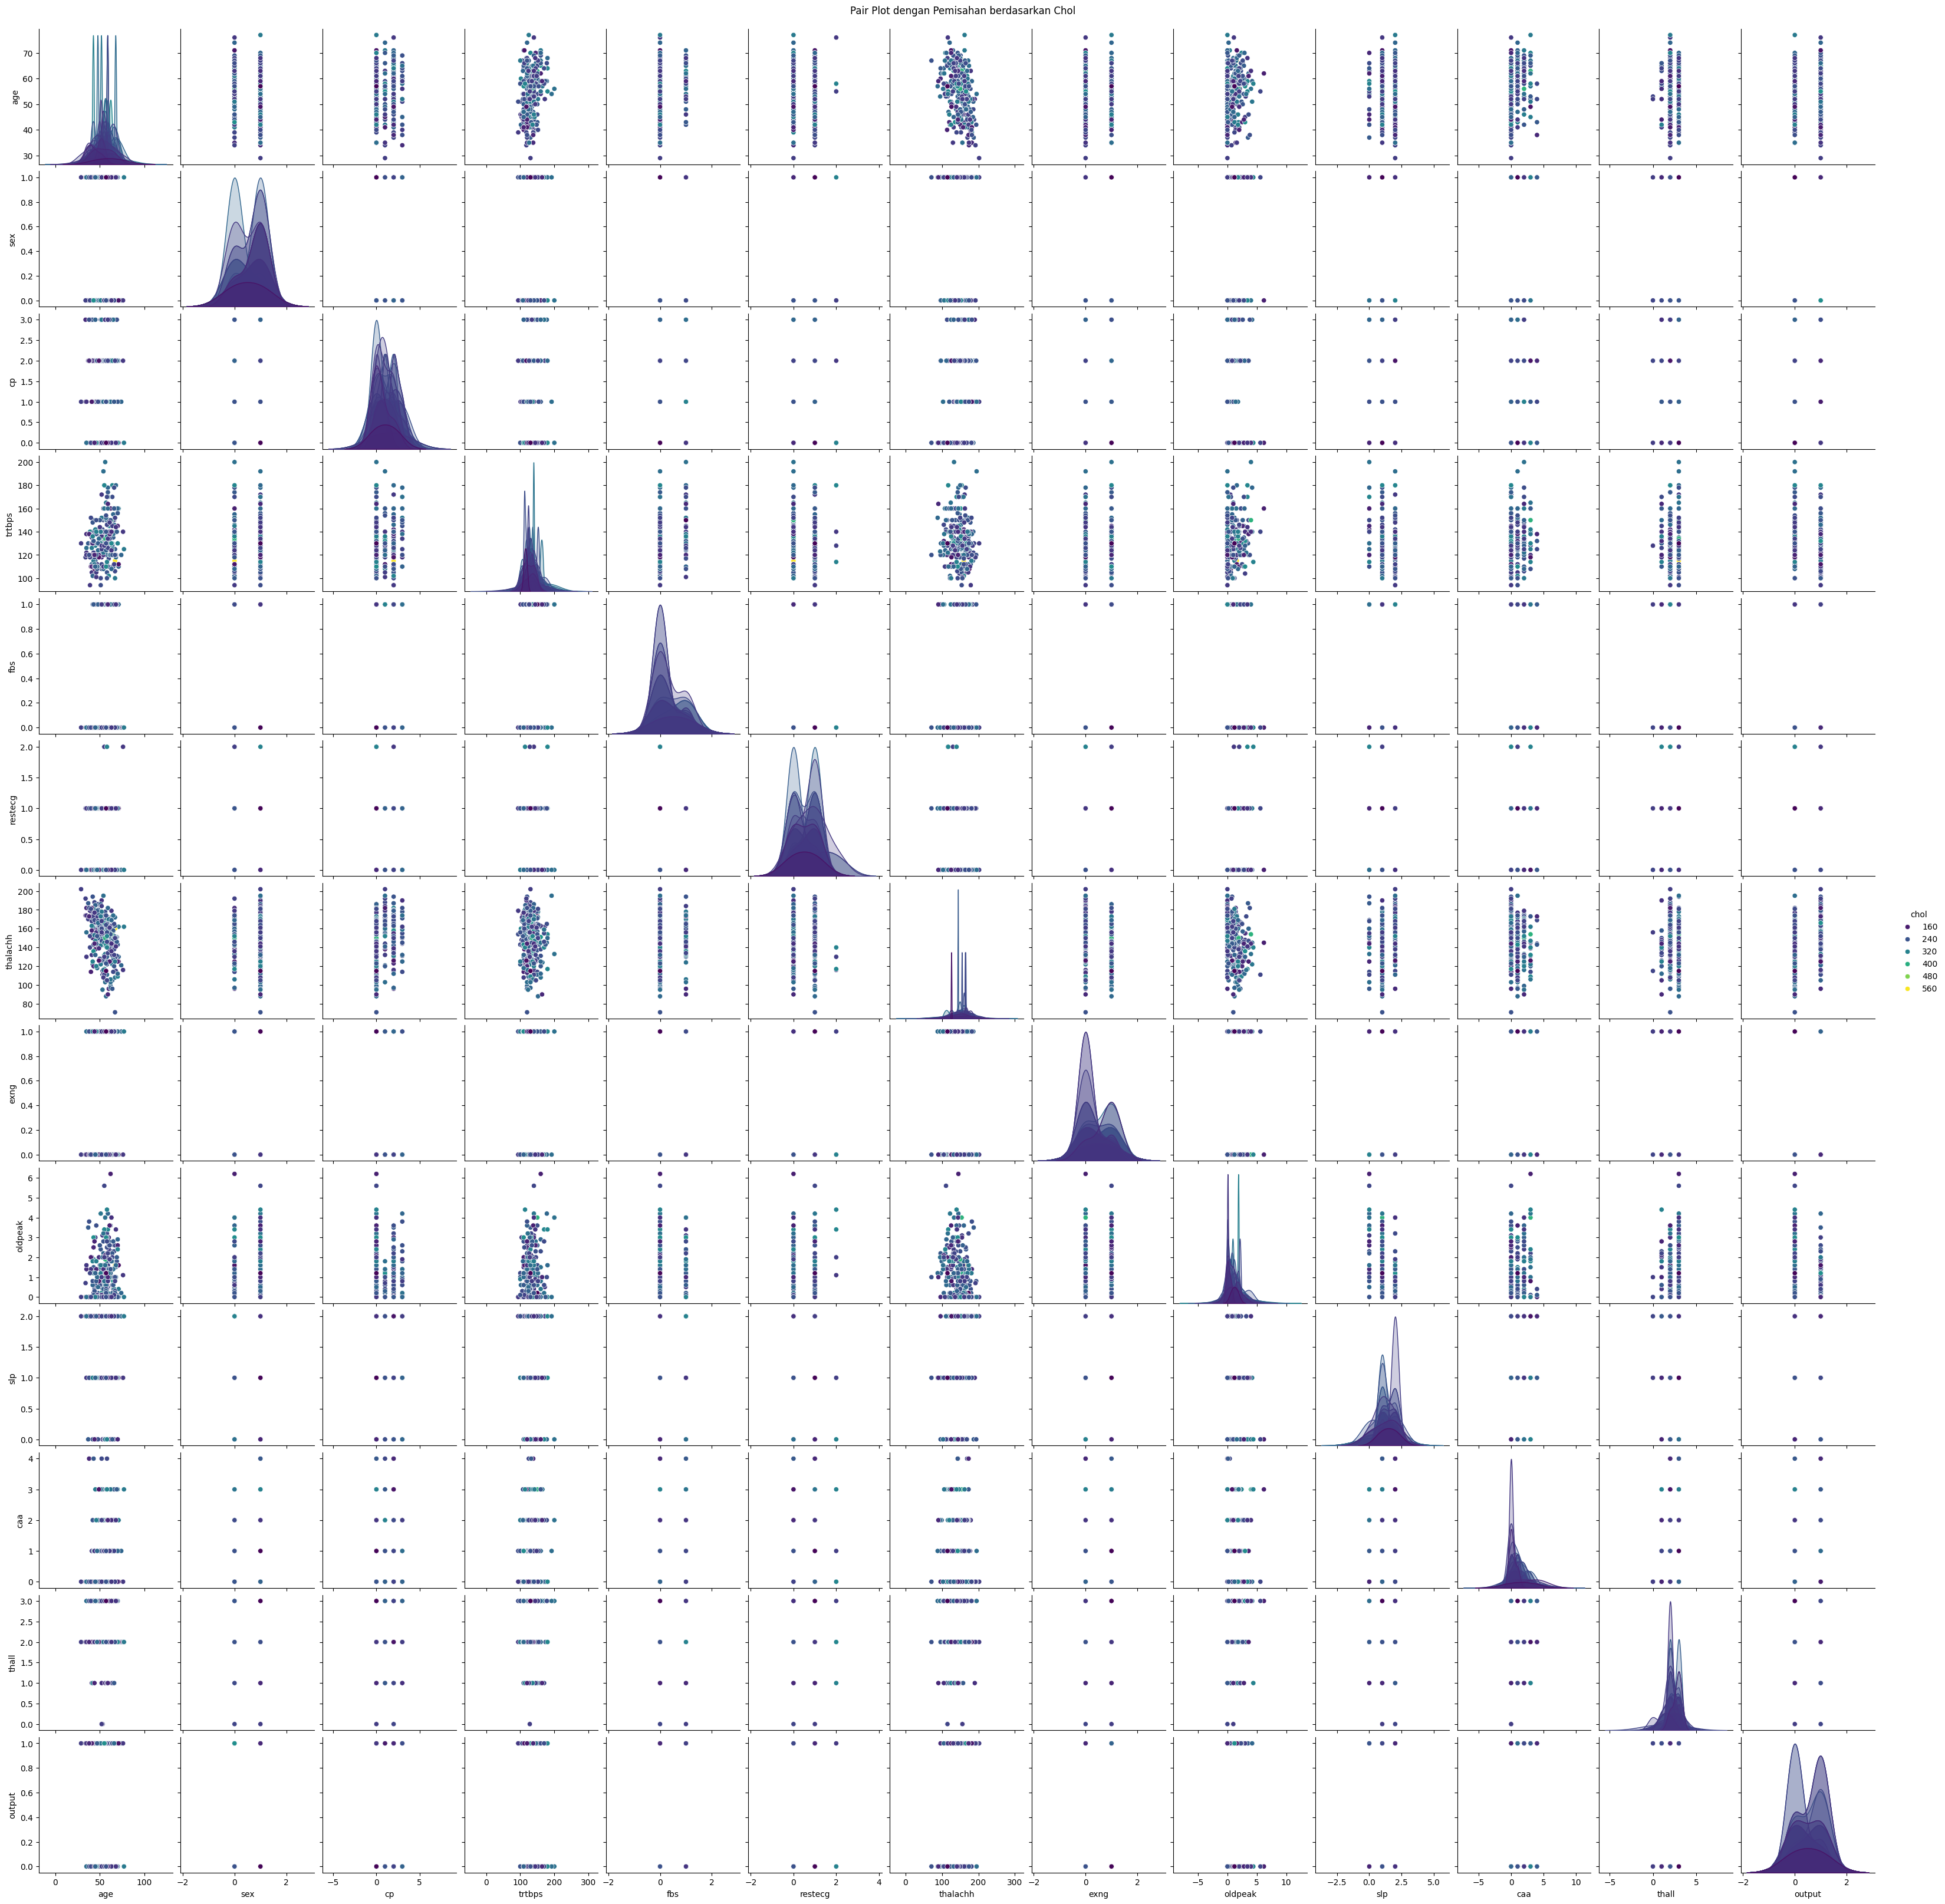

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='chol', palette='viridis')
plt.suptitle('Pair Plot dengan Pemisahan berdasarkan Chol', y=1.0)
plt.show()

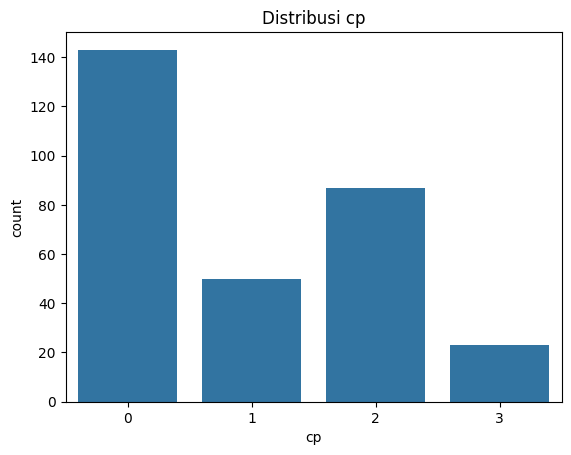

In [68]:
sns.countplot(x='cp', data=df)
plt.title('Distribusi cp')
plt.show()

2. Compare two different variables and provide short analysis (ex: gender and sex, gender and cp, cp and chol, etc.)

In [38]:
#perbandingan dua variable age & chol
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'data' is your DataFrame with relevant columns, including 'age' and 'chol'

# Data Analysis
# Separating data based on age
df_young = data[data['age'] < 30]  
df_old = data[data['age'] >= 30]  

average_cholesterol_young = df_young['chol'].mean()
average_cholesterol_old = df_old['chol'].mean()


t_statistic, p_value = ttest_ind(df_young['chol'], df_old['chol'])

# Data Reporting
print("Average Cholesterol Level (Young): ", average_cholesterol_young)
print("Average Cholesterol Level (Old): ", average_cholesterol_old)
print("T-test Statistic: ", t_statistic)
print("P-value: ", p_value)

# If p-value < 0.05, it can be concluded that there is a significant difference in average cholesterol levels between the age groups.


Average Cholesterol Level (Young):  204.0
Average Cholesterol Level (Old):  246.40397350993376
T-test Statistic:  -0.8163214252332816
P-value:  0.41496188446253546


conclusion : pada visualisasi diatas apa bila p value kurang dari 0.05 maka ada perbedaan signifikan antara cholesterol dan level, selain itu semakin tinggi kolesterol yang terkandung dalam darah maka akan semakin berpengaruh pada thalach